<a href="https://colab.research.google.com/github/shivammishra9911/AI--Tweets-Disaster-Management-system/blob/main/Disaster_Tweet_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Disaster Tweet Classifier with NLP, ML, and Deep Learning**
This notebook loads and classifies disaster tweets using both mach/nine learning and deep learning techniques.



In [ ]:
# Install required libraries
!pip install kagglehub nltk tensorflow

In [ ]:
# ✅ Download NLTK data
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# ✅ Download dataset from KaggleHub
import kagglehub
path = kagglehub.dataset_download("vbmokin/nlp-with-disaster-tweets-cleaning-data")
print("Dataset path:", path)
dataset_path = path + "/train_clean.csv"

100%|██████████| 1.00M/1.00M [00:00<00:00, 70.3MB/s]

Extracting files...
Dataset path: /root/.cache/kagglehub/datasets/vbmokin/nlp-with-disaster-tweets-cleaning-data/versions/2


In [ ]:
import os
import pandas as pd

# Assuming 'path' is already set from kagglehub
dataset_path = os.path.join(path, "train_data_cleaning.csv")  # Use the file that exists

print("Using dataset:", dataset_path)
df = pd.read_csv(dataset_path)
df.head()


Using dataset: /root/.cache/kagglehub/datasets/vbmokin/nlp-with-disaster-tweets-cleaning-data/versions/2/train_data_cleaning.csv


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this # earthquake...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask . Canada,1
2,5,NaN,NaN,All residents asked to ' shelter in place ' ...,1
3,6,NaN,NaN,"13,000 people receive # wildfires evacuation ...",1
4,7,NaN,NaN,Just got sent this photo from Ruby # Alaska a...,1


In [ ]:
# ✅ Load dataset
import pandas as pd
df = pd.read_csv(dataset_path)
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this # earthquake...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask . Canada,1
2,5,NaN,NaN,All residents asked to ' shelter in place ' ...,1
3,6,NaN,NaN,"13,000 people receive # wildfires evacuation ...",1
4,7,NaN,NaN,Just got sent this photo from Ruby # Alaska a...,1


In [ ]:
# ✅ Preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(preprocess)
df.head()

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this # earthquake...,1,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask . Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to ' shelter in place ' ...,1,resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive # wildfires evacuation ...",1,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby # Alaska a...,1,got sent photo ruby alaska smoke wildfire pour...


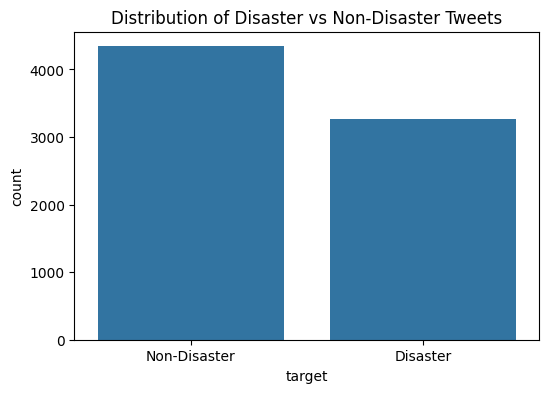

In [ ]:
# ✅ Visualize data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title("Distribution of Disaster vs Non-Disaster Tweets")
plt.xticks([0,1], ['Non-Disaster','Disaster'])
plt.show()

In [ ]:
# ✅ Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['clean_text'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name} Report:")
    print(classification_report(y_test, preds))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       874
           1       0.82      0.68      0.74       649

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.79      1523
weighted avg       0.80      0.80      0.80      1523


Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       874
           1       0.82      0.69      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523


SVM Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       874
           1       0.83      0.67      0.74       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted av

In [ ]:
# ✅ Deep Learning (LSTM)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['clean_text'])
sequences = tokenizer.texts_to_sequences(df['clean_text'])
X_seq = pad_sequences(sequences, maxlen=max_len)
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_seq, y, test_size=0.2, random_state=42)

model_dl = Sequential()
model_dl.add(Embedding(max_words, 128, input_length=max_len))
model_dl.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model_dl.add(Dense(1, activation='sigmoid'))
model_dl.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dl.summary()

history = model_dl.fit(X_train_dl, y_train_dl, epochs=5, batch_size=64, validation_data=(X_test_dl, y_test_dl))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 212ms/step - accuracy: 0.6337 - loss: 0.6402 - val_accuracy: 0.7971 - val_loss: 0.4494
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - accuracy: 0.8477 - loss: 0.3482 - val_accuracy: 0.7886 - val_loss: 0.4696
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 175ms/step - accuracy: 0.9040 - loss: 0.2629 - val_accuracy: 0.7722 - val_loss: 0.5211
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 166ms/step - accuracy: 0.9251 - loss: 0.2119 - val_accuracy: 0.7649 - val_loss: 0.5925
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 164ms/step - accuracy: 0.9386 - loss: 0.1688 - val_accuracy: 0.7544 - val_loss: 0.6832


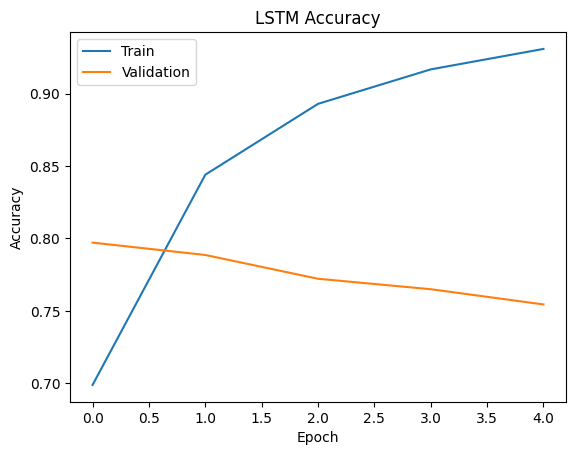

In [ ]:
# ✅ LSTM Accuracy Plot
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('LSTM Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# ✅ Prediction Function
def classify_tweet(text):
    processed = preprocess(text)
    seq = tokenizer.texts_to_sequences([processed])
    padded = pad_sequences(seq, maxlen=max_len)
    pred = model_dl.predict(padded)[0][0]
    return "Disaster" if pred > 0.5 else "Not Disaster"

# Example usage
example = "earthquake in india."
print("Tweet:", example)
print("Prediction:", classify_tweet(example))

Tweet: earthquake in india.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
Prediction: Disaster
